Bu proje kapsamında, Women in Tech Acdemy bitirme ödevi olarak  NBA verileri analiz edilmiştir. Numpy, Pandas, Seaborn, Matplotlib gibi pek çok veri bilimi modülü kullanılmıştır. Beş farklı csv dosyası incelenmiştir. Yapılan analizler görsel ögelerle desteklenmiştir.

Proje başlangıcında, csv dosyaları birleştirilerek analiz edilmeye çalışılmıştır fakat dosya boyutunun büyümesi ve kodun daha yavaş çalışması gibi sebeplerle ayrı ayrı dosyalar okunarak işlemlere devam edilmiştir.

In [ ]:
#Proje başlangıcında denenen ilk yöntem:

import glob #Glob modülü, Python’da belirli bir klasör içindeki dosyaların listelenmesini sağlayan bir modüldür. 
import numpy as np 
import pandas as pd 
import os

# Bilgisayardaki klasörden CSV dosyalarının listesini alınır:
path = "C:/Users/aayse/OneDrive/Desktop/data"
csv_files = glob.glob(path + "/*.csv") #glob modülü kullanılarak csv dosyaları listelenir.

# Her CSV dosyası DataFrame'e okunur. Bu, veri çerçevelerinin bir listesini oluşturur.
df_list = (pd.read_csv(file) for file in csv_files)

# Tüm DataFrame'ler birleştirilir:
concat_df   = pd.concat(df_list, ignore_index=True)


**Veri setinde toplamda kaç  satır ve kaç sütun var?**

In [ ]:
concat_df.shape

Ardından belirtildiği üzere, dosyalar ayrı ayrı okunup işlemler yapılmıştır.

In [1]:
#Daha sonra da kullanılmak üzere gerekli modülller sisteme dahil edilir:
import numpy as np 
import pandas as pd 
import os

#Tüm dosyalar okunur:
games = pd.read_csv("games.csv")
games_details = pd.read_csv("games_details.csv")
players = pd.read_csv("players.csv")
ranking = pd.read_csv("ranking.csv")
teams = pd.read_csv("teams.csv")

C:\Users\aayse\AppData\Local\Temp\ipykernel_5184\2133029695.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("games_details.csv")


In [2]:
print(f'Oyun dosyasinda {games.shape[0]} satir ve {games.shape[1]} sütun bulunmaktadir.')

Oyun dosyasinda 25796 satir ve 21 sütun bulunmaktadir.


In [3]:
games.columns.tolist() #sütunlar listelenmiştir.

['GAME_DATE_EST',
 'GAME_ID',
 'GAME_STATUS_TEXT',
 'HOME_TEAM_ID',
 'VISITOR_TEAM_ID',
 'SEASON',
 'TEAM_ID_home',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'TEAM_ID_away',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'HOME_TEAM_WINS']

**Games.csv'de Bulunan Sütun İsimlerinin Açıklamaları:**

Listelenen sütunların türkçe açıklamaları verilmiştir. Ok işareti ile gösterilenler ise sütun isimlerinin değiştirilmesi düşünülen isimlerdir.

-------------------------------------------------------------------------------------------------------------------------------------------------

 **'GAME_DATE_EST':** Oyun_Günü

 **'GAME_ID':** Oyun_No

 **'GAME_STATUS_TEXT':** Oyunun Durumu : "Final" işlemin tamamlandığı anlamına gelmektedir  --------------> Oyun_Durumu

 **'HOME_TEAM_ID':** Ev sahibi takımın kimliği  --------------> Ana_Takım_No

 **'VISITOR_TEAM_ID':** Ziyaretçi ekibin kimliği  --------------> Ziyaretci_Takım_No

 **'SEASON':** Oyunun gerçekleştiği sezon  --------------> Sezon

 **'TEAM_ID_home':** Ev sahibi takımın kimliği (HOME_TEAM_ID'nin kopyası)  --------------> Ana_Takım_No_Kopya

 **'PTS_home':** Ev sahibi takımın attığı puan sayısı  --------------> Ana_Takım_Puan

 **'FG_PCT_home':** Saha Gol Yüzdesi ev sahibi takım  --------------> Ana_T_Saha_Gol_Yüzdesi

 **'FT_PCT_home':** Ev sahibi takımın Serbest Atış Yüzdesi  --------------> Ana_T_Serbest_Atış_Yüzdesi

 **'FG3_PCT_home':** Ev sahibi takımın Üç Sayı Yüzdesi  --------------> Ana_T_Üç_Sayı_Yüzdesi

 **'AST_home':** Ev sahibi takımın asistleri  --------------> Ana_T_Assist

 **'REB_home':** Ev sahibi takımın ribaundları  --------------> Ana_T_Saha_Gol_Ribaund

 **'TEAM_ID_away':** Deplasman takımının kimliği (VISITOR_TEAM_ID'nin kopyası)  --------------> Ziyaretci_Takım_No_Kopy
 
 **'PTS_away':** Deplasman takımı tarafından atılan puan sayısı  --------------> Deplasman_Takım_Puan

 **'FG_PCT_away':** Saha Gol Yüzdesi deplasman takımı  --------------> Deplasman_Saha_Gol

 **'FT_PCT_away':** Deplasman takımının Serbest Atış Yüzdesi  --------------> Deplasman_Serbest_Atış

 **'FG3_PCT_away':** Deplasman takımının Üç Puan Yüzdesi  --------------> Deplasman_ÜçPuan

 **'AST_away':** Deplasman takımının asistleri (Asist, basketbolda sayı atma yolunda giden takım arkadaşına pas verme anlamında kullanılır. Bazen pas verenin asist yapıp yapmadığına karar vermek için değerlendirme yapılır.)  --------------> Deplasman_Assist

 **'REB_away':** Deplasman takımının ribaundları (Ribaund basketbolda bir topun basketbol potasına çarpıp havada döndükten sonra basket olmadan havada tutulmasına denir.) --------------> Deplasman_Ribaund

 **'HOME_TEAM_WINS':** Ev sahibi takım maçı kazanırsa  --------------> Ana_Takım_Kazanma

**Games.csv dosyası için sütun isimlerinin değiştirilmesi:**

In [4]:
games.columns = ["Oyun_Günü","Oyun_No","Oyun_Durumu","Ana_Takım_No","Ziyaretci_Takım_No", "Sezon", "Ana_Takım_No_Kopya","Ana_Takım_Puan","Ana_T_Saha_Gol_Yüzdesi", "Ana_T_Serbest_Atış_Yüzdesi", "Ana_T_Üç_Sayı_Yüzdesi", "Ana_T_Assist", "Ana_T_Saha_Gol_Ribaund", "Ziyaretci_Takım_No_Kopya", "Deplasman_Takım_Puan","Deplasman_Saha_Gol", "Deplasman_Serbest_Atış", "Deplasman_ÜçPuan", "Deplasman_Assist","Deplasman_Ribaund", "Ana_Takım_Kazanma"]

In [5]:
games

,Oyun_Günü,Oyun_No,Oyun_Durumu,Ana_Takım_No,Ziyaretci_Takım_No,Sezon,Ana_Takım_No_Kopya,Ana_Takım_Puan,Ana_T_Saha_Gol_Yüzdesi,Ana_T_Serbest_Atış_Yüzdesi,...,Ana_T_Assist,Ana_T_Saha_Gol_Ribaund,Ziyaretci_Takım_No_Kopya,Deplasman_Takım_Puan,Deplasman_Saha_Gol,Deplasman_Serbest_Atış,Deplasman_ÜçPuan,Deplasman_Assist,Deplasman_Ribaund,Ana_Takım_Kazanma
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


**Dataframe.info() işlevi:**

**Özet, veri türleri ve her sütundaki boş olmayan değerlerin sayısıyla birlikte tüm sütunların listesini içermektedir.**

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Oyun_Günü                   25796 non-null  object 
 1   Oyun_No                     25796 non-null  int64  
 2   Oyun_Durumu                 25796 non-null  object 
 3   Ana_Takım_No                25796 non-null  int64  
 4   Ziyaretci_Takım_No          25796 non-null  int64  
 5   Sezon                       25796 non-null  int64  
 6   Ana_Takım_No_Kopya          25796 non-null  int64  
 7   Ana_Takım_Puan              25697 non-null  float64
 8   Ana_T_Saha_Gol_Yüzdesi      25697 non-null  float64
 9   Ana_T_Serbest_Atış_Yüzdesi  25697 non-null  float64
 10  Ana_T_Üç_Sayı_Yüzdesi       25697 non-null  float64
 11  Ana_T_Assist                25697 non-null  float64
 12  Ana_T_Saha_Gol_Ribaund      25697 non-null  float64
 13  Ziyaretci_Takım_No_Kopya    257

In [7]:
#Oyun gübü object türünde bir değişken olarak tanımlanmıştır. datetime olacak şekilde türünü değiştirdim.
games['Oyun_Günü']= pd.to_datetime(games['Oyun_Günü'])

**Duplicate Sütunların Silinmesi:**

In [8]:
games.T. drop_duplicates().T 

,Oyun_Günü,Oyun_No,Oyun_Durumu,Ana_Takım_No,Ziyaretci_Takım_No,Sezon,Ana_Takım_Puan,Ana_T_Saha_Gol_Yüzdesi,Ana_T_Serbest_Atış_Yüzdesi,Ana_T_Üç_Sayı_Yüzdesi,Ana_T_Assist,Ana_T_Saha_Gol_Ribaund,Deplasman_Takım_Puan,Deplasman_Saha_Gol,Deplasman_Serbest_Atış,Deplasman_ÜçPuan,Deplasman_Assist,Deplasman_Ribaund,Ana_Takım_Kazanma
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,104.0,0.398,0.76,0.333,23.0,53.0,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,101.0,0.443,0.933,0.429,20.0,46.0,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,108.0,0.412,0.813,0.324,28.0,52.0,119.0,0.489,1.0,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,122.0,0.484,0.933,0.4,33.0,55.0,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,115.0,0.551,0.75,0.407,32.0,39.0,127.0,0.471,0.76,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,98.0,0.448,0.682,0.5,29.0,45.0,95.0,0.387,0.659,0.5,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,99.0,0.44,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


Sütun sayısının 21'den 19'a düştüğü görülmektedir. Sütun açıklamalarında bulunan iki kopya veri silinmiştir.

**Games Dosyasındaki Eksik Değerlerin Sayısı ve Azalan Şekilde Sıralanışı:**

In [9]:
print(games.isnull().sum().sort_values(ascending=False))

Ana_T_Üç_Sayı_Yüzdesi         99
Deplasman_Ribaund             99
Deplasman_Assist              99
Deplasman_ÜçPuan              99
Deplasman_Serbest_Atış        99
Deplasman_Saha_Gol            99
Ana_Takım_Puan                99
Ana_T_Saha_Gol_Yüzdesi        99
Ana_T_Serbest_Atış_Yüzdesi    99
Deplasman_Takım_Puan          99
Ana_T_Assist                  99
Ana_T_Saha_Gol_Ribaund        99
Ziyaretci_Takım_No_Kopya       0
Oyun_Günü                      0
Oyun_No                        0
Ana_Takım_No_Kopya             0
Sezon                          0
Ziyaretci_Takım_No             0
Ana_Takım_No                   0
Oyun_Durumu                    0
Ana_Takım_Kazanma              0
dtype: int64


Birçok sütunda 99'ar tane eksik veri olduğu görülmüştür. Eksik verilerin tespiti veri analizi için oldukça önemlidir. Eksik veriler seaborn kütüphanesi ile görselleştirilmiştir.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


In [11]:
sns.set(rc={"figure.dpi":50, "figure.figsize":(9,6)}) #grafik kalitesi ve boyutları ayarladım.

<AxesSubplot:>

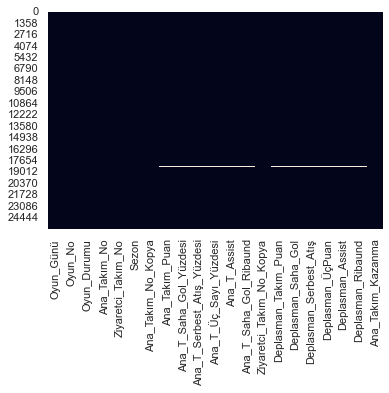

In [12]:
sns.heatmap(games.isnull(), cbar=False)

Eksik veri içeren satırları kaldırmak veri kaybına yol açar. Eksik veriler yerine sütunun ortalaması veya medyanı yazılır. 

Veri setinde aykırı değer olabileceğinden ortalama yerine medyan kullanılması tavsiye edilir.

In [13]:
Deplasman_Assist_median = games["Deplasman_Assist"].median()
Deplasman_Assist_median

21.0

Deplasman_Assist sütununun medyan değerinin 21.0 olduğu görülmüştür.

In [14]:
#Eksik verileri doldurmak:
games["Deplasman_Assist"].fillna(Deplasman_Assist_median, inplace= True) #inplace'i yaptığım değişiklikleri kaydetmek amacıyla kullandım.

In [15]:
games.dropna(inplace=True) #eksik verilerin dropna methoduyla veri setinden kaldırılması
#Böylece eksik veri probleminden kurtulmuş oldum.

In [16]:
#Eksik veri var mı diye yeniden kontrol ediyorum.
games.isnull().sum().sum()#veri setindeki toplam eksik verileri görmemizi sağlar.
#0 değerine oluşırız. Yani eksik veri bulunmamaktadır.

0

**Sezonlara Göre Ev Sahibi Takımın Maçı Kazanma Durumu:**

<AxesSubplot:xlabel='Sezon,Ana_Takım_Kazanma', ylabel='Galibiyet Sayısı'>

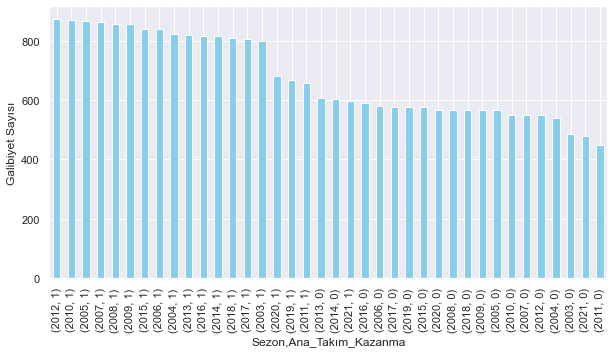

In [18]:
plt.figure(figsize=(10,5))
plt.ylabel('Galibiyet Sayısı')
games.groupby("Sezon")["Ana_Takım_Kazanma"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#87CEEB") #Gruplardan herhangi birinde bulunan girdileri bulmak için get_group() işlevini kullanırız.

Sezonlara göre kazanma oranlarına bakıldığında, en yüksek kazanma oranı 2012 ve 2010 sezonunda görülmüştür. En başarısız sezon ise 2011 sezonudur.

**Ana Takım Puanları Kategorize Edilerek, Games Dosyasına Bir Sütun Daha Ekleme İşlemi:**

In [19]:
#Öncelikle en yüksekten düşüğe puanları sıraladım:
games["Ana_Takım_Puan"].sort_values(ascending=False).unique()

array([168., 161., 158., 157., 154., 153., 152., 151., 150., 149., 148.,
       147., 146., 145., 144., 143., 142., 141., 140., 139., 138., 137.,
       136., 135., 134., 133., 132., 131., 130., 129., 128., 127., 126.,
       125., 124., 123., 122., 121., 120., 119., 118., 117., 116., 115.,
       114., 113., 112., 111., 110., 109., 108., 107., 106., 105., 104.,
       103., 102., 101., 100.,  99.,  98.,  97.,  96.,  95.,  94.,  93.,
        92.,  91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,
        81.,  80.,  79.,  78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,
        70.,  69.,  68.,  67.,  66.,  65.,  64.,  63.,  62.,  60.,  59.,
        36.])

In [20]:
#Puan durumu için bir fonksiyon tanımladım.
def Puan_Kıyasla(puan):
    if puan >=120:
        return "Harika Puan"
    elif puan < 120 and puan >= 50:
         return "İyi Puan"
    elif puan < 50:
         return "Yeterince İyi Değil"
        
games["Puan_Durumu"] = games.Ana_Takım_Puan.apply(Puan_Kıyasla)


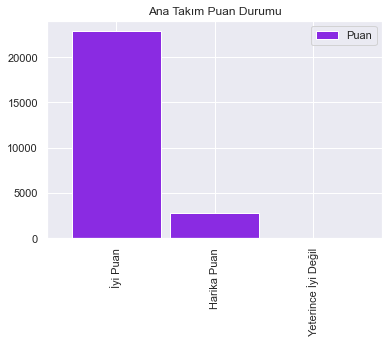

In [21]:
games["Puan_Durumu"].value_counts().plot.bar(width=0.90, color="#8A2BE2", label="Puan").set_title("Ana Takım Puan Durumu")
plt.legend()

Sonuçlara göre ev sahibi takımın kazanma puanları filtrelendiğinde, en fazla puanların 50-120 aralığında değiştiği görülmüştür.

**Bir Takımın Ev Sahibiyken ve Deplasmanda Yaptığı Maçların Kıyaslanması:**

In [22]:
games.groupby('Ana_Takım_Kazanma').size() #Tüm takımların ortak olarak kazanma ve kaybetme durumu

Ana_Takım_Kazanma
0    10542
1    15155
dtype: int64

<AxesSubplot:xlabel='Ana_Takım_Kazanma', ylabel='Puanlar'>

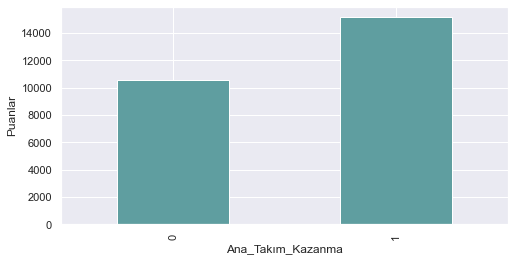

In [23]:
plt.figure(figsize=(8,4))
plt.ylabel('Puanlar')
games.groupby('Ana_Takım_Kazanma').size().plot.bar(width= 0.50, color="#5F9EA0")

Sonuçlar incelendiğinde, takımların kendi ev sahipliği yaptığı maçlarda daha başarılı olduğu görülmüştür.

In [24]:
#Ayrı ayrı her takım için kazanma ve kaybetme oranlarını görmek istersek:
games.groupby("Ana_Takım_No")['Ana_Takım_Kazanma'].value_counts()

Ana_Takım_No  Ana_Takım_Kazanma
1610612737    1                    484
              0                    369
1610612738    1                    581
              0                    330
1610612739    1                    532
              0                    356
1610612740    1                    444
              0                    375
1610612741    1                    506
              0                    364
1610612742    1                    570
              0                    302
1610612743    1                    574
              0                    272
1610612744    1                    578
              0                    290
1610612745    1                    562
              0                    308
1610612746    1                    521
              0                    348
1610612747    1                    564
              0                    373
1610612748    1                    609
              0                    310
1610612749    1                 

<AxesSubplot:xlabel='Ana_Takım_No,Ana_Takım_Kazanma', ylabel='1=0 kazandı, 0=kaybetti'>

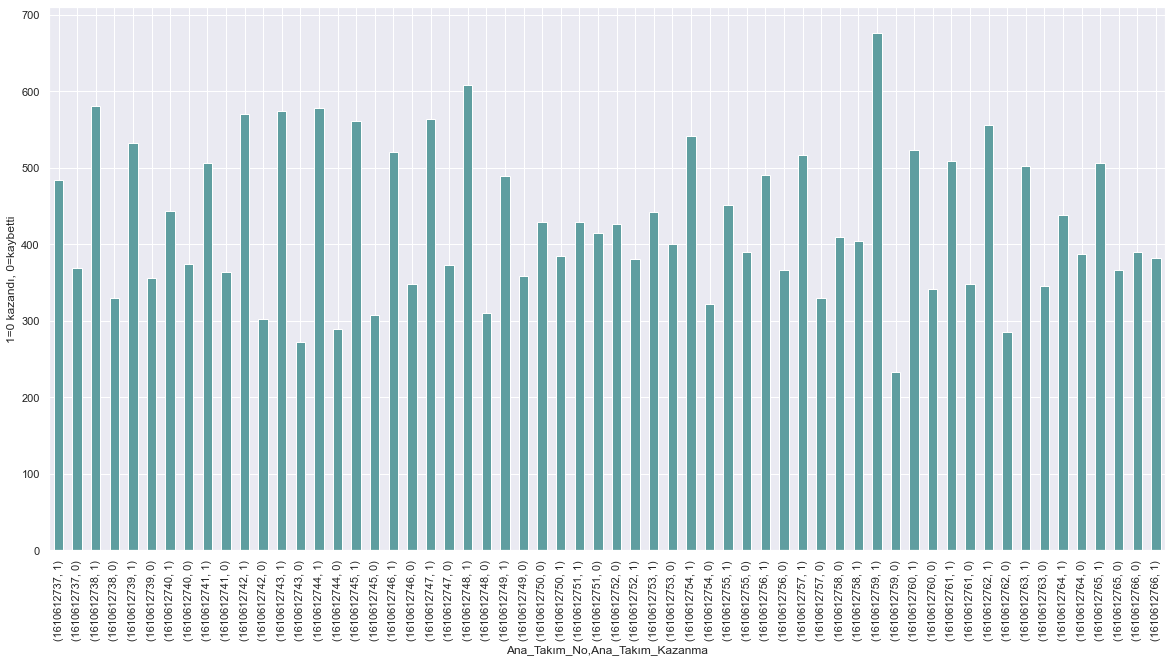

In [25]:
plt.figure(figsize=(20,10))
plt.ylabel('1=0 kazandı, 0=kaybetti')
games.groupby("Ana_Takım_No")['Ana_Takım_Kazanma'].value_counts().plot.bar(width= 0.50, color="#5F9EA0") #1 ise ana takım kazanır, 0 ise deplasman kazanmış olur.


Sonuçlar takım bazında incelendiğinde, daha detaylı hangi takımın ne oranda kazanıp ne oranda kaybettiği görülmüştür.

**İç Sahada (kendi sahalarında) Takımların Daha Başarılı Olmalarının Asist ve Rebaund Sayılarıyla İlişkisinin İncelenmesi:**

In [26]:
grup = games.groupby('Ana_Takım_Kazanma') #kazanma durumu grup değerine atılmıştır.

In [27]:
kazanma_durumu = grup.get_group(1) #kazanmak=1, kaybetmek=0 anlamına gelmektedir.

In [28]:
#ortalama fonksiyonu
def ortalama_bul(grup, sütun):
    return grup[sütun].mean()

In [29]:
#Burada iç sahada ve deplasmanda kazanma ve kaybetme durumu asist ve rebaundla ilişkilendirilmiştir.
İc_Saha = [ortalama_bul(kazanma_durumu,'Ana_Takım_Puan'), ortalama_bul(kazanma_durumu,'Ana_T_Assist'), ortalama_bul(kazanma_durumu,'Ana_T_Saha_Gol_Ribaund')]

Deplasman = [ortalama_bul(kazanma_durumu,'Deplasman_Takım_Puan'),ortalama_bul(kazanma_durumu,'Deplasman_Assist'), ortalama_bul(kazanma_durumu,'Deplasman_Ribaund')]

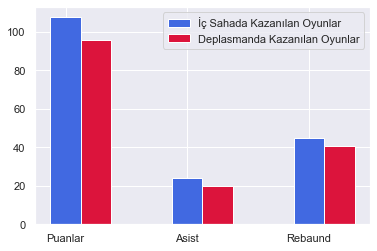

In [30]:
text = ['Puanlar','Asist','Rebaund']
text2 = np.arange(len(text)) #n boyutlu diziye textin uzunluğunu atadım.

plt.bar(text,İc_Saha, width = 0.25, color = '#4169E1', label = 'İç Sahada Kazanılan Oyunlar')
plt.bar(text2 + 0.25, Deplasman, width = 0.25, color = '#DC143C', label = 'Deplasmanda Kazanılan Oyunlar')
plt.legend()

Tüm sonuçlar incelendiğinde, iç saha maçlarında daha fazla puan, asist ve ribaund kazanıldığı görülmektedir. Bu sebeple takımlar iç sahalarında oynadıkları maçlarda daha başarılı olmuşlardır.

**Sezonlara Göre Takımların İç Sahalarında Kazanma Oranları:**

<AxesSubplot:xlabel='Sezon,Ana_Takım_Kazanma', ylabel='Galibiyet Sayısı'>

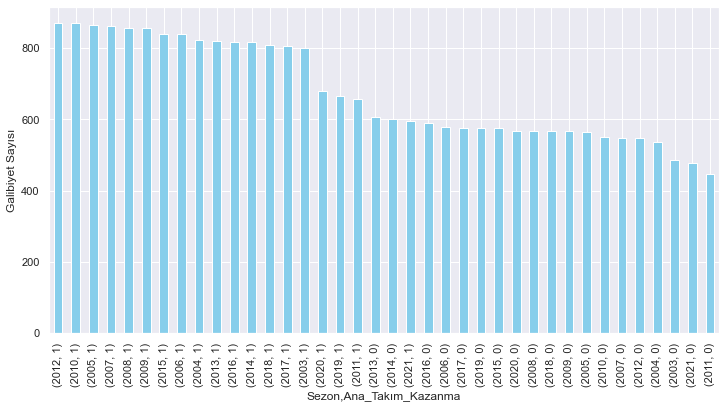

In [31]:
plt.figure(figsize=(12,6))
plt.ylabel('Galibiyet Sayısı')
games.groupby("Sezon")["Ana_Takım_Kazanma"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#87CEEB") #Gruplardan herhangi birinde bulunan girdileri bulmak için get_group() işlevini kullanırız.

In [32]:
#Bu fonksiyon, tüm sayısal sütunlar için bazı temel tanımlayıcı istatistikleri gösterir:
games.describe()

,Oyun_No,Ana_Takım_No,Ziyaretci_Takım_No,Sezon,Ana_Takım_No_Kopya,Ana_Takım_Puan,Ana_T_Saha_Gol_Yüzdesi,Ana_T_Serbest_Atış_Yüzdesi,Ana_T_Üç_Sayı_Yüzdesi,Ana_T_Assist,Ana_T_Saha_Gol_Ribaund,Ziyaretci_Takım_No_Kopya,Deplasman_Takım_Puan,Deplasman_Saha_Gol,Deplasman_Serbest_Atış,Deplasman_ÜçPuan,Deplasman_Assist,Deplasman_Ribaund,Ana_Takım_Kazanma
count,2.569700e+04,2.569700e+04,2.569700e+04,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,2.173597e+07,1.610613e+09,1.610613e+09,2011.832237,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.589758
std,5.460853e+06,8.641473e+00,8.655103e+00,5.380624,8.641473e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.655103e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.491887
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060117e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120045e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170072e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


**count**     #Kaç adet kayıt olduğu

**mean**      #Average değeri

**std**       #Standard sapma değeri

**min**       #Bu seride minimum değer

**25%**       #Toplam kayıtların %25 'i nin ortalama değeri

**50%**       #Toplam kayıtların %50'i nin ortalama değeri

**75%**       #Toplam kayıtların %75 'i nin ortalama değeri

**max**       #Bu seride maximum değer

Tanımlayıcı istatistiklerle analiz yapılmamıştır. Ylanızca bilgilendirme amacıyla verilmiştir.

describe() varsayılan olarak yalnızca sayısal sütunları analiz eder, ancak include parametresini kullanırsanız başka veri türleri sağlayabilirsiniz:

In [33]:
games.describe(include=object)

,Oyun_Durumu,Puan_Durumu
count,25697,25697
unique,1,3
top,Final,İyi Puan
freq,25697,22867


**value_counts()**

Verinin keşfi sırasında kullanılan oldukça kullanışlı bir metottur. Sütundaki NaN olmayan her bir unique değerin kaç kez kullanıldığını gösteren bir seri döndürür. 

Bu seri default olarak azalan şekilde sıralanır ve NaN değerleri içermemektedir. 

In [34]:
games["Oyun_Günü"].value_counts()

2020-12-23    16
2021-05-16    15
2009-01-02    15
2020-12-29    15
2020-12-26    15
              ..
2017-04-03     1
2004-05-29     1
2004-05-30     1
2010-01-07     1
2014-10-04     1
Name: Oyun_Günü, Length: 4133, dtype: int64

Seriyi incelediğimizde en çok oyunun “23.12.2020” tarihinde oynandığı, en az oyunun ise “04.10.2014” tarihinde oynandığı görülmektedir. 

----------------------------------------------------------------------------------------------------------------------------------

**Games_details.csv Dosyasındaki Sütun İsimleri Hakkında Bilgi:**

In [35]:
print(f'Oyun dosyasinda {games_details.shape[0]} satir ve {games_details.shape[1]} sütun bulunmaktadir.')

Oyun dosyasinda 645953 satir ve 29 sütun bulunmaktadir.


In [36]:
games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

**Games_details Dosyasındaki Eksik Değerlerin Sayısı ve Azalan Şekilde Sıralanışı:**

In [37]:
print(games_details.isnull().sum().sort_values(ascending=False))

NICKNAME             615591
COMMENT              540351
START_POSITION       398738
PLUS_MINUS           129264
FTM                  105603
PTS                  105603
PF                   105603
TO                   105603
BLK                  105603
STL                  105603
AST                  105603
REB                  105603
DREB                 105603
OREB                 105603
FT_PCT               105603
FTA                  105603
FG3A                 105603
FG3_PCT              105603
FG3M                 105603
FG_PCT               105603
FGA                  105603
FGM                  105603
MIN                  105603
TEAM_ID                   0
PLAYER_NAME               0
PLAYER_ID                 0
TEAM_CITY                 0
TEAM_ABBREVIATION         0
GAME_ID                   0
dtype: int64


Pek çok sütunda eksik veriler olduğu görülmüştür. Games_details dosyasında uygulanan eksik veri doldurma adımları tüm dosyalarda uygulanmıştır.

In [38]:
#Sütun isimlerinin listelenmesi:
games_details.columns.tolist()

['GAME_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_CITY',
 'PLAYER_ID',
 'PLAYER_NAME',
 'NICKNAME',
 'START_POSITION',
 'COMMENT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'PLUS_MINUS']

 'GAME_ID': Oyun Kimliği --------------> Oyun_No

 'TEAM_ID': Takım Kimliği --------------> Takım_No

 'TEAM_ABBREVIATION': Takımın Kısa Adı --------------> Takım_Kısaltması

 'TEAM_CITY': Oyunun Oynandığı İl --------------> Oynanan_Şehir

 'PLAYER_ID': Oyuncunun Kimliği --------------> Oyuncu_No

 'PLAYER_NAME': Oyuncunun ismi --------------> Oyuncu_İsmi

 'NICKNAME': Oyuncunun pozisyonu (hiçbir şey yoksa yedek kulübesinde olduğu düşünülmelidir.) --------------> Oyuncu_Pozisyonu

 'START_POSITION': Oyuna başladığı pozisyon --------------> Başlangıç_Pozisyonu

 'COMMENT': Yorum --------------> Yorum

 'MIN': Oynanan dakika --------------> Oynanan_Dakika

 'FGM': Saha Golleri Yapıldığı Dakika --------------> Saha_Gol_Dk

 'FGA': Denenen Saha Hedefleri --------------> Saha_Hedef

 'FG_PCT': Alan Hedefi Yüzdesi --------------> Alan_Hedef

 'FG3M': Üç sayılık şut yapıldı (Bir oyuncunun sahadayken yaptığı 3 sayılık atışların yüzdesi) --------------> Saha_Üç_Sayı_Yüzdesi

 'FG3A': Takımın denediği 3 Sayılık Şutların Yüzdesi --------------> Denenen_Üç_Sayılık_Yüzdesi

 'FG3_PCT': Üç sayılık şut yüzdesi--------------> Üç_Sayılık_Yüzdesi

 'FTM':Serbest Atış Yapıldı --------------> Yapılan_Serbest_Atış

 'FTA': Serbest Atış Denenmesi --------------> Serbest_Atış_Denemesi

 'FT_PCT': Serbest Atış Yüzdesi --------------> Serbest_Atış_Yüzdesi

 'OREB': Hücum ribaundları -------------->  Hücüm_Ribaundları

 'DREB': Savunma Ribaundları --------------> Savunma_Ribaundları

 'REB': Rebounds:basketbolda bir topun basketbol potasına çarpıp havada döndükten sonra basket olmadan havada tutulmasına denir. --------------> Ribaund

 'AST': Asist --------------> Asist

 'STL': steals: nba draft'larında daha düşük sıralardan oyuncu seçip, gelen oyuncunun üst düzey bir yıldıza dönüşmesi anlamına gelen terimdir. --------------> Yıldızı_Parlayan

 'BLK':Engellenen çekimler --------------> Engellenen_Cekimler

 'TO': Devir --------------> Devir

 'PF':Kişisel faul --------------> Kişisel_Faul

 'PTS': Oyuncunun attığı puan sayısı --------------> Oyuncu_Puan
 
 'PLUS_MINUS': Artı-Eksi.Bir oyuncunun kendi takımının skoru ile rakip takımın skorunun farkına yaptığı etkiyi ölçen bir spor istatistiğidir. --------------> Artı_Eksi

**Games_details Dosyası İçin Sütun İsimlerinin Değiştirilmesi:**

In [39]:
games_details.columns = ["Oyun_No","Takım_No", "Takım_Kısaltması","Oynanan_Şehir","Oyuncu_No", "Oyuncu_İsmi", "Oyuncu_Pozisyonu", "Başlangıç_Pozisyonu","Yorum", "Oynanan_Dakika","Saha_Gol_Dk", "Saha_Hedef","Alan_Hedef","Saha_Üç_Sayı_Yüzdesi","Denenen_Üç_Sayılık_Yüzdesi","Üç_Sayılık_Yüzdesi","Yapılan_Serbest_Atış","Serbest_Atış_Denemesi", "Serbest_Atış_Yüzdesi", "Hücüm_Ribaundları","Savunma_Ribaundları", " Ribaund", "Asist","Yıldızı_Parlayan", "Engellenen_Cekimler", "Devir", "Kişisel_Faul","Oyuncu_Puan","Artı_Eksi"]

**Takım Kısaltmasına Göre Yapılan Maksimum Faullerin Bulunması:**

In [40]:
games_details.groupby("Takım_Kısaltması").agg({"Kişisel_Faul": "max"})

,Kişisel_Faul
Takım_Kısaltması,
ATL,6.0
BKN,6.0
BOS,15.0
CHA,6.0
CHI,6.0
CLE,6.0
DAL,6.0
DEN,6.0
DET,6.0


Text(0, 0.5, 'Takım Kısaltması')

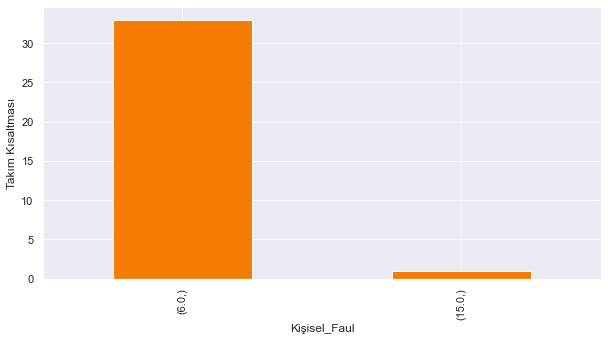

In [41]:
plt.figure(figsize=(10,5))
games_details.groupby("Takım_Kısaltması").agg({"Kişisel_Faul": "max"}).value_counts().plot.bar(width= 0.50, color="#F57C02")
plt.ylabel("Takım Kısaltması")


En fazla faul yapan takım 'BOS' kısaltmasını kullanmaktadır. Bu takım max 15.0 değerinde faul yapmıştır. Diğer takımların max faul değeri aynı olup 6.0 olarak görülmüştür.

**Maçların Oynandığı Şehirlerin Listesi:**

In [42]:
games_details["Oynanan_Şehir"].unique()

array(['Minnesota', 'Miami', 'Cleveland', 'Chicago', 'Indiana',
       'San Antonio', 'Milwaukee', 'Golden State', 'Toronto', 'Denver',
       'Sacramento', 'Utah', 'Washington', 'Portland', 'Orlando', 'LA',
       'Atlanta', 'Detroit', 'Boston', 'Dallas', 'Houston', 'New York',
       'Memphis', 'Charlotte', 'New Orleans', 'Phoenix', 'Los Angeles',
       'Brooklyn', 'Philadelphia', 'Oklahoma City', 'New Jersey',
       'Seattle', 'New Orleans/Oklahoma City'], dtype=object)

**Maçlarda Oynayan Basketbolcuların İsimleri:**

In [43]:
games_details["Oyuncu_İsmi"].unique()

array(['Anthony Edwards', 'Jaden McDaniels', 'Karl-Anthony Towns', ...,
       'Brian Butch', 'Tyler Wilkerson', 'Kevin Anderson'], dtype=object)

In [ ]:
plt.figure(figsize=(10,5))
plt.ylabel('Galibiyet Sayısı')
games_details.groupby("Oynanan_Şehir")["Oyuncu_Puan"].value_counts().plot.bar(width= 0.50, color="#87CEEB") 

------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Players.csv Dosyasının İncelenmesi**

In [46]:
print(f'Oyun dosyasinda {players.shape[0]} satir ve {players.shape[1]} sütun bulunmaktadir.')

Oyun dosyasinda 7228 satir ve 4 sütun bulunmaktadir.


In [47]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [48]:
#Sütun isimlerinin listelenmesi:
players.columns.tolist()

['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON']

**Sütun İsimlerinin Açıklamaları:**

'PLAYER_NAME':Oyuncu İsmi --------------> Oyuncu_İsmi (Bu sütun games_details.csv dosyası içerisinde de bulunmaktadır.)

'TEAM_ID' : Takım Kimliği  -------------->  Takım_No (Bu sütun games_details.csv dosyası içerisinde de bulunmaktadır.)

'PLAYER_ID': Oyuncu Kimliği -------------->  Oyuncu_No (Bu sütun games_details.csv dosyası içerisinde de bulunmaktadır.)

'SEASON':Sezon -------------->  Sezon (Bu sütun games_details.csv dosyası içerisinde de bulunmaktadır.)

In [49]:
players.columns = ["Oyuncu_İsmi","Takım_No", "Oyuncu_No","Sezon"]

In [50]:
players

,Oyuncu_İsmi,Takım_No,Oyuncu_No,Sezon
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


---------------------------------------------------------------------------------------------------------------------------------------------------------------

**Ranking.csv Dosyasının İncelenmesi**

In [51]:
print(f'Oyun dosyasinda {ranking.shape[0]} satir ve {ranking.shape[1]} sütun bulunmaktadir.')

Oyun dosyasinda 201792 satir ve 13 sütun bulunmaktadir.


In [52]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201792 entries, 0 to 201791
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        201792 non-null  int64  
 1   LEAGUE_ID      201792 non-null  int64  
 2   SEASON_ID      201792 non-null  int64  
 3   STANDINGSDATE  201792 non-null  object 
 4   CONFERENCE     201792 non-null  object 
 5   TEAM           201792 non-null  object 
 6   G              201792 non-null  int64  
 7   W              201792 non-null  int64  
 8   L              201792 non-null  int64  
 9   W_PCT          201792 non-null  float64
 10  HOME_RECORD    201792 non-null  object 
 11  ROAD_RECORD    201792 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.0+ MB


In [89]:
#Sütun isimlerinin listelenmesi:
ranking.columns.tolist()

['TEAM_ID',
 'LEAGUE_ID',
 'SEASON_ID',
 'STANDINGSDATE',
 'CONFERENCE',
 'TEAM',
 'G',
 'W',
 'L',
 'W_PCT',
 'HOME_RECORD',
 'ROAD_RECORD',
 'RETURNTOPLAY']

Sütun İsimlerinin Açıklamaları:

 'TEAM_ID': Takım Kimliği -----------------------> Takım_No

 'LEAGUE_ID':Lig Kimliği -----------------------> Lig_No

 'SEASON_ID': Sezon Kimliği -----------------------> Sezon_No

 'STANDINGSDATE': Puan durumu tarihi -----------------------> Puan_Tarihi

 'CONFERENCE': Konferans (doğu veya batı) -----------------------> Konferans

 'TEAM': Takım ismi -----------------------> Takım

 'G': Sezonda oynanan maç sayısı -----------------------> Sezonda_Oynanan_Maç

 'W': Sezonda kazanılan maç sayısı -----------------------> Sezonda_Kazanılan_Maç

 'L': Sezonda kaybedilen maç sayısı -----------------------> Sezonda_Kaybedilen_Maç

 'W_PCT':Kazanç Yüzdesi-----------------------> Kazanç

 'HOME_RECORD': Sezonda ev rekoru-----------------------> Ev_Rekoru

 'ROAD_RECORD': Sezonda yol rekoru -----------------------> Yol_Rekoru

 'RETURNTOPLAY': Oyuna Dönüş -----------------------> Oyuna_Dönüş

In [53]:
ranking.columns = ["Takım_No", "Lig_No","Sezon_No", "Puan_Tarihi", "Konferans", "Takım", "Sezonda_Oynanan_Maç", "Sezonda_Kazanılan_Maç", "Sezonda_Kaybedilen_Maç", "Kazanç", "Ev_Rekoru","Yol_Rekoru", "Oyuna_Dönüş"]

In [54]:
ranking

,Takım_No,Lig_No,Sezon_No,Puan_Tarihi,Konferans,Takım,Sezonda_Oynanan_Maç,Sezonda_Kazanılan_Maç,Sezonda_Kaybedilen_Maç,Kazanç,Ev_Rekoru,Yol_Rekoru,Oyuna_Dönüş
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Teams.csv Dosyasının İncelenmesi**

In [55]:
print(f'Oyun dosyasinda {teams.shape[0]} satir ve {teams.shape[1]} sütun bulunmaktadir.')

Oyun dosyasinda 30 satir ve 14 sütun bulunmaktadir.


In [56]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [57]:
#Sütun isimlerinin listelenmesi:
teams.columns.tolist()

['LEAGUE_ID',
 'TEAM_ID',
 'MIN_YEAR',
 'MAX_YEAR',
 'ABBREVIATION',
 'NICKNAME',
 'YEARFOUNDED',
 'CITY',
 'ARENA',
 'ARENACAPACITY',
 'OWNER',
 'GENERALMANAGER',
 'HEADCOACH',
 'DLEAGUEAFFILIATION']

Sütun İsimlerinin Açıklamaları:

 'LEAGUE_ID':Lig kimliği, numarası ----------------------> Lig_No

 'TEAM_ID': Takım kimliği, numarası----------------------> Takım_No

 'MIN_YEAR': Takımın minimum NBA şampiyonluğu yılı ----------------------> Min_Şampiyonluk_Yılı

 'MAX_YEAR': Takımın NBA şampiyonluğuna ulaştığı maksimum yıl ----------------------> Max_Şampiyonluk_Yılı

 'ABBREVIATION': Takım adının kısaltması ----------------------> Kısaltma

 'NICKNAME': Takımın takma adı ----------------------> Takma_Ad

 'YEARFOUNDED': Kuruluş Yılı ----------------------> Kuruluş_Yılı

 'CITY': Takımın Ana Şehri ----------------------> Ana_Şehir

 'ARENA': Takımın Stadyumu ----------------------> Arena

 'ARENACAPACITY': Stadyumun Kapasitesi ----------------------> Arena_Büyüklüğü

 'OWNER': Takımın sonuncu sahibi  ----------------------> Takım_Sahibi

 'GENERALMANAGER': Takımın Genel Müdürü ----------------------> Takım_Genel_Müdür

 'HEADCOACH': Baş Antrenör ----------------------> Baş_Antrenör

 'DLEAGUEAFFILIATION': Lig bağlantısı ----------------------> Lig

In [58]:
teams.columns = ["Lig_No", "Takım_No","Min_Şampiyonluk_Yılı", "Max_Şampiyonluk_Yılı", "Kısaltma", "Takma_Ad", "Kuruluş_Yılı", "Ana_Şehir", "Arena", "Arena_Büyüklüğü", "Takım_Sahibi","Takım_Genel_Müdür", "Baş_Antrenör", "Lig"]

In [59]:
teams

,Lig_No,Takım_No,Min_Şampiyonluk_Yılı,Max_Şampiyonluk_Yılı,Kısaltma,Takma_Ad,Kuruluş_Yılı,Ana_Şehir,Arena,Arena_Büyüklüğü,Takım_Sahibi,Takım_Genel_Müdür,Baş_Antrenör,Lig
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


**Maçın Oynandığı Şehire Göre Takımın Kazanma Oranının Bulunması:**

İki farklı dataframe üzerinde işlem yapabilmek için merge işlemi yapılmalıdır. Üzerinde analiz yapılmak istenen sütunlar games ve games_details dosyalarında bulunmaktadır. Bu sebeple dosyalar birleştirilmiştir.

In [68]:
games = pd.DataFrame(games)
games_details = pd.DataFrame(games_details)

yenidf = pd.merge(games, games_details, how='outer', on = "Oyun_No")

In [69]:
yenidf

,Oyun_Günü,Oyun_No,Oyun_Durumu,Ana_Takım_No,Ziyaretci_Takım_No,Sezon,Ana_Takım_No_Kopya,Ana_Takım_Puan,Ana_T_Saha_Gol_Yüzdesi,Ana_T_Serbest_Atış_Yüzdesi,...,Hücüm_Ribaundları,Savunma_Ribaundları,Ribaund,Asist,Yıldızı_Parlayan,Engellenen_Cekimler,Devir,Kişisel_Faul,Oyuncu_Puan,Artı_Eksi
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646881,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646882,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646883,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Oynanan_Şehir,Ana_Takım_Kazanma', ylabel='Puan'>

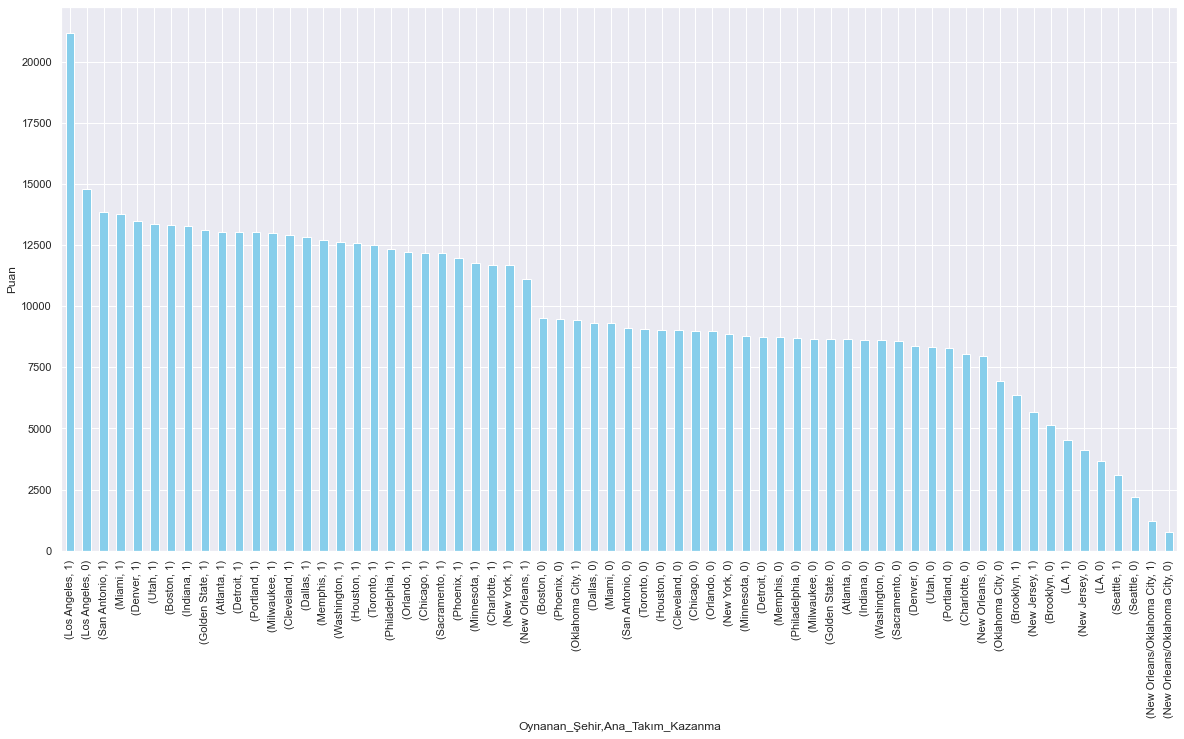

In [71]:
plt.figure(figsize=(20,10))
plt.ylabel('Puan')
yenidf.groupby("Oynanan_Şehir")["Ana_Takım_Kazanma"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#87CEEB") 

Grafik incelendiğinde, Los Angeles'ta oynanan basketbol maçlarının daha başarılı sonuçlandığı görülmüştür. En başarısız maçlar ise New Orleans/Oklahama City'de gerçekleşmiştir.